# Pymaceuticals Inc.

---

#Pymaceuticals Northwestern University Data Science Bootcamp Analysis

As can be seen through a visual representation of the data analyzed below, there are many results that can be seen

 1. In general, a majority of rats were often repeat patients with multiple drugs being tested. In this case, 10 different drugs were given to over 250 mice, allowing data to be taken from a number of sources. In order to accurately test these drugs to get a more precise result, more rats must be tested with these drugs and include a control variable to compare.
 2. Out of all the medications given to the mice in treatment of their tumors, Capomulin saw the largest decrease in overall tumor volume. In particular, this can be seen through an overall lower tumor value (40), whereas every other medication had a value of over (50). There was also a lower variance measured with this particular drug, indicating that mice given this drug show that this medication is overall more reliable than other medications. Mice given this drug also showed the largest overall decreasing tumor volume. This indicates that Capomulin is the most successful medication at reducing tumor volume. 
 3. Regarding gender, there were more male mice than female mice included in this study. Unfortunately I have not chosen to continue searching details regarding gender and tumor size or reduction depending on which medication was given. From the brief data analysis I was able to conduct, females using Infubinol are at highest risk for tumors, and saw the lowest success at reducing tumor volume.

Overall, this assignment was interesting to analyze. It was fascinating to see that certain drugs were more effective at treating tumors, and while others were effective enough, they were not as effective as Capomulin, the most successful drug from the trial.

In order to improve this study's data in the future, more mice must be tested and data analyzed when completed. A larger sample size is necessary to understand how effective these drugs are, rather than assuming based off a small sample size. In the future, I would also look closer at variables of gender and weight/size as indicators for drug success.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_df = pd.merge(mouse_metadata, study_results,
                                 how='outer', on='Mouse ID')

# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
mouse_count = mouse_metadata['Mouse ID'].count()
mouse_count

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_study_df[mouse_study_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_mice = mouse_study_df.loc[(mouse_study_df['Mouse ID']) == 'g989']
all_duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = mouse_study_df.loc[mouse_study_df['Mouse ID'] != 'g989']
clean_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
unique_mice = clean_mouse_df['Mouse ID'].nunique()
unique_mice

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
clean_mouse_total = clean_mouse_df.set_index(['Drug Regimen'])
drug_mean = clean_mouse_total.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
drug_median = clean_mouse_total.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
drug_variance = clean_mouse_total.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
drug_stdev = clean_mouse_total.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
drug_sem = clean_mouse_total.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

mouse_drug_summary = pd.concat( [drug_mean,
                                 drug_median,
                                 drug_variance,
                                 drug_stdev,
                                 drug_sem], axis=1)

mouse_drug_summary.columns = ['Mean Tumor Value',
                              'Median Tumor Volume',
                              'Tumor Volume Variance',
                              'Tumor Volume Std. Dev.',
                              'Tumor Volume Std. Err.']

mouse_drug_summary

,Mean Tumor Value,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
drug_summary_df = clean_mouse_df.set_index(['Drug Regimen'])
drug_summary_total = drug_summary_df.groupby('Drug Regimen').aggregate({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
drug_summary_total

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: title={'center': 'Drug Regimen Values'}, xlabel='Drug Regimen', ylabel='Number of Observed Mouse Timepoints'>

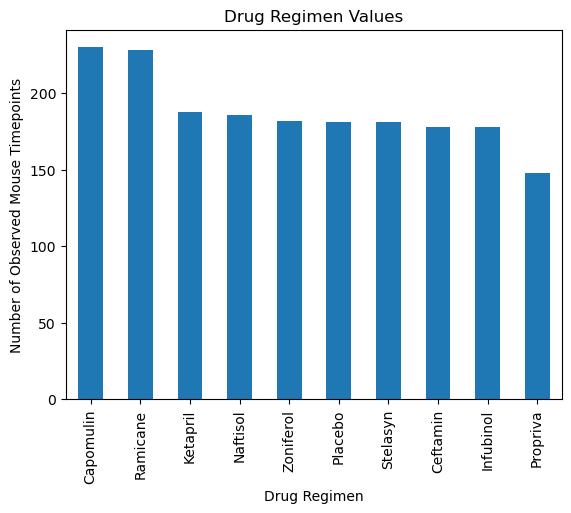

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
rows_drug_regimen = clean_mouse_df['Mouse ID'].groupby(clean_mouse_df['Drug Regimen']).count()
rows_counted = rows_drug_regimen.sort_values(ascending=False)

mouse_bar_graph_1 = rows_counted.plot(kind='bar')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Mouse Timepoints')
plt.title('Drug Regimen Values')


mouse_bar_graph_1

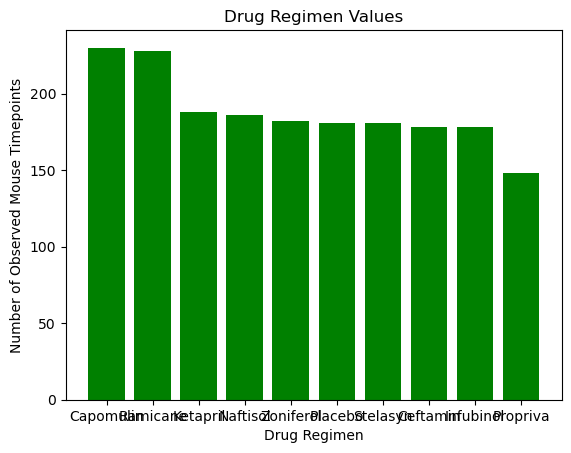

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
yvalue = rows_counted.to_list()
xvalue = rows_counted.index.values

plt.bar(xvalue, yvalue, color='green', align= 'center')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Mouse Timepoints')
plt.title('Drug Regimen Values')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

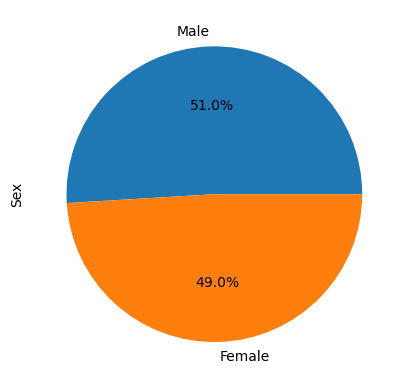

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_mice = clean_mouse_df['Sex'].value_counts()
gender_mice.plot.pie(autopct= '%.1f%%')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

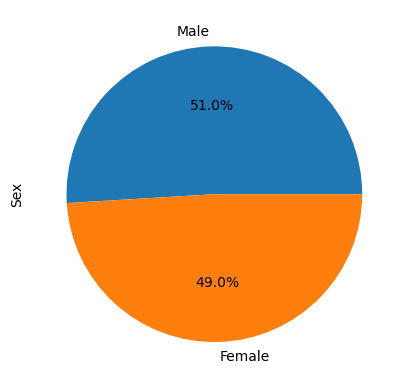

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = gender_mice.index.values

plt.pie(gender_mice.values, labels=genders, autopct= '%.1f%%')
plt.ylabel('Sex')
plt.show

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tumors = clean_mouse_df.groupby(['Mouse ID'])['Timepoint'].max()
max_tumors = max_tumors.reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = max_tumors.merge(clean_mouse_df, on=['Mouse ID', 'Timepoint'], how='left')
merged_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
   final_tumor_volume = merged_df.loc[merged_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']

    # add subset 
   tumor_volume_list.append(final_tumor_volume)

    # Determine outliers using upper and lower bounds
   quartiles = final_tumor_volume.quantile([.25,.5,.75])
   lowerq = quartiles[.25]
   upperq = quartiles[.75]
   iqr = upperq - lowerq
   lower_bound = lowerq - (1.5*iqr)
   upper_bound = upperq + (1.5*iqr)

   outliers = final_tumor_volume.loc[(final_tumor_volume < lower_bound) | (final_tumor_volume > upper_bound)]
   print(f"{drug}'s potential {outliers}")

Capomulin's potential Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential Series([], Name: Tumor Volume (mm3), dtype: float64)


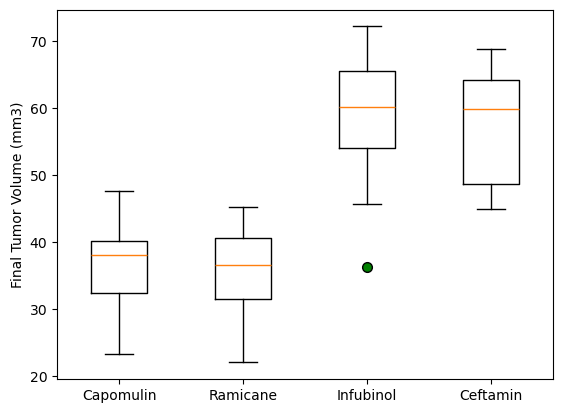

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot_mouse = dict(markerfacecolor='green', markersize=7)
plt.boxplot(tumor_volume_list, labels = treatment_list, flierprops= boxplot_mouse)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

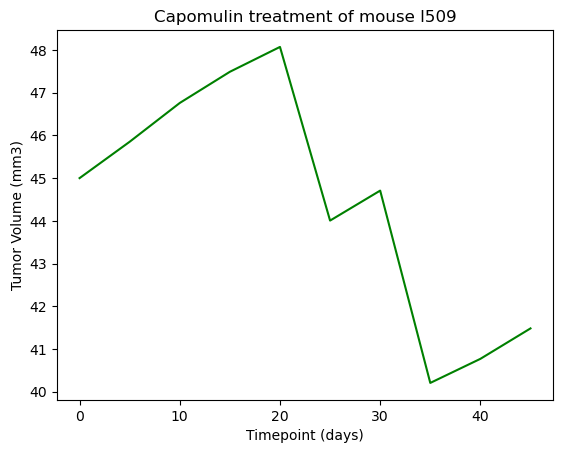

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_line_graph = clean_mouse_df.loc[clean_mouse_df['Mouse ID']== 'l509']
x_axis = mouse_line_graph['Timepoint']
y_axis = mouse_line_graph['Tumor Volume (mm3)']
mouse_results = plt.plot(x_axis,y_axis,color="green", linewidth=1.5)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

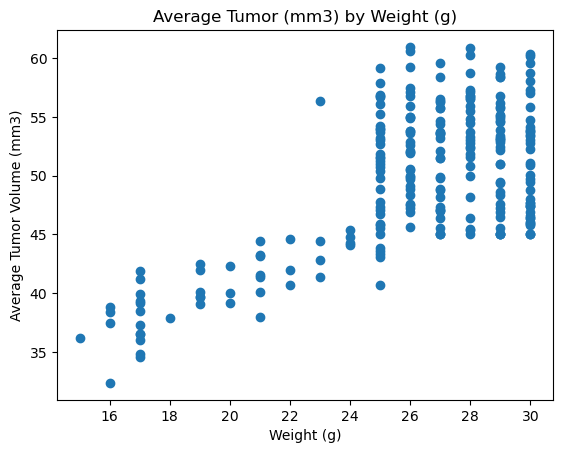

In [28]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
weight_mouse = clean_mouse_df.loc[clean_mouse_df['Mouse ID']== 'Capomulin']
avg_tumor = clean_mouse_df.groupby(['Mouse ID']).mean()
x_axis = weight_mouse['Weight (g)']
y_axis = weight_mouse['Tumor Volume (mm3)']
plt.scatter(avg_tumor ['Weight (g)'], 
            avg_tumor['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor (mm3) by Weight (g)')
plt.show

## Correlation and Regression

In [39]:
# Calculate the correlation coefficient and a linear regression model 
correlation_coef = st.pearsonr(clean_mouse_df['Weight (g)'], clean_mouse_df['Tumor Volume (mm3)'])
print(f"The correlation between both factors is {round(correlation_coef[0],2)}")

The correlation between both factors is 0.59


The r-squared is: 0.5881275121987516
The equation of the regression line is: y = 1.33 x + 16.25


<function matplotlib.pyplot.show(close=None, block=None)>

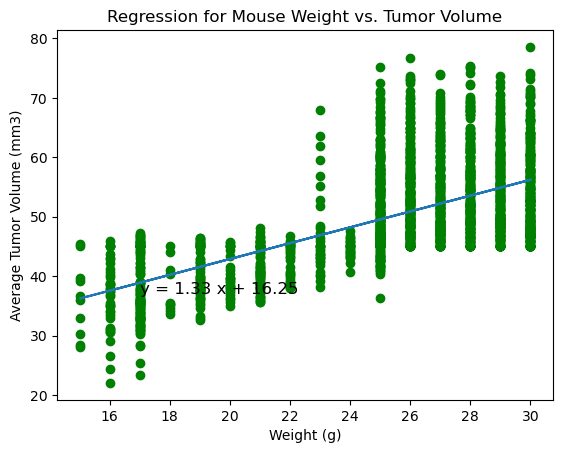

In [53]:
x_values = clean_mouse_df["Weight (g)"]
y_values = clean_mouse_df["Tumor Volume (mm3)"]
(slope, intercept,rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values*slope+intercept
line_eq = (f"y = {round(slope, 2)} x + {round(intercept, 2)}")
plt.scatter(x_values, y_values, color='green')
plt.plot(x_values, regress_values)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title("Regression for Mouse Weight vs. Tumor Volume")
plt.annotate(line_eq,(17,37),fontsize=12,color="black")
print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")
plt.show